In [70]:
import numpy as np
from qoop.compilation.qsp import QuantumCompilation
from qoop.core.ansatz import g2gn
from qoop.core.state import specific
from qoop.backend import constant
%load_ext autoreload
%autoreload 2
num_qubits = 7
num_layers = 1
state = np.random.uniform(low = 0, high = 2*np.pi, size = 2**num_qubits)

optimizers = ['sgd', 'adam', 'qng_fubini_study', 'qng_qfim', 'qng_adam']

compilers = []

for optimizer in optimizers:
    compiler = QuantumCompilation(
        u = g2gn(num_qubits, num_layers),
        vdagger = specific(state).inverse(),
        optimizer = optimizer,
        metrics_func = [
            'loss_basic', 
            'compilation_trace_fidelities'
        ]
    )

    compiler.fit(
        num_steps = 50, 
    )
    #plot figure
    compilers.append(compiler)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


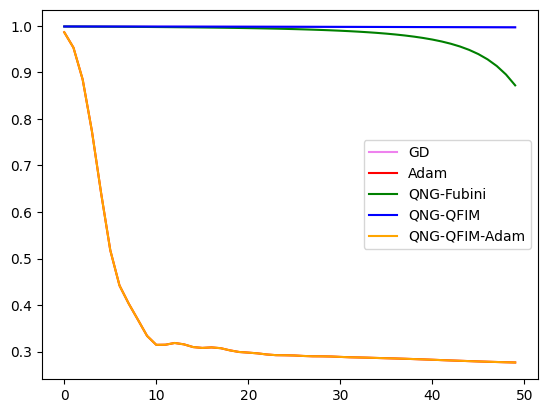

In [ ]:
import matplotlib.pyplot as plt
labels = ['GD', 'Adam', 'QNG-Fubini', 'QNG-QFIM', 'QNG-QFIM-Adam']
colors = ['violet', 'red', 'green', 'blue', 'orange']
for i, compiler in enumerate(compilers):
    
    plt.plot(compiler.metrics['loss_basic'], color = colors[i], label = labels[i])
plt.legend()

In [ ]:
loss_basic_values = np.array([compiler.metrics['loss_basic'] for compiler in compilers])
np.savetxt(f'loss_basic_values_{num_qubits}.txt', loss_basic_values)